In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
class Murray_FDM:

    a: np.ndarray
    b: np.ndarray

    def __init__(self, l, tf, d, p, dx, dt, size):

        dl = d / (p * l**2)
        lb = (dl * dt) / dx**2

        gamma1 = 1. - 0.5 * dt + 2. * lb
        gamma2 = 1. + 0.5 * dt - 2. * lb

        a = np.zeros((size**2, size**2))
        b = np.zeros((size**2, size**2))

        for i in range(size**2):

            if i == 0:

                # CONDIÇÃO DE CONTORNO: VERTICE - BAIXO, ESQUERDA
                a[i,i], b[i,i] = 6, -6
                a[i,i+1], b[i,i+1] = -4, 4
                a[i,i+2], b[i,i+2] = 1, -1
                a[i,i+size], b[i,i+size] = -4, 4
                a[i,i+2*size], b[i, i+2*size] = 1, -1

            elif i == size-1:

                # CONDIÇÃO DE CONTORNO: VERTICE - BAIXO, DIREITA
                a[i,i], b[i,i] = 6, -6
                a[i,i-1], b[i,i-1] = -4, 4
                a[i,i-2], b[i,i-2] = 1, -1
                a[i,i+size], b[i,i+size] = -4, 4
                a[i,i+2*size], b[i,i+2*size] = 1, -1

            elif i == size**2 - size:

                # CONDIÇÃO DE CONTORNO: VERTICE - CIMA, ESQUERDA
                a[i,i], b[i,i] = 6, -6
                a[i,i+1], b[i,i+1] = -4, 4
                a[i,i+2], b[i,i+2] = 1, -1
                a[i,i-size], b[i,i-size] = -4, 4
                a[i,i-2*size], b[i, i-2*size] = 1, -1

            elif i == size**2 - 1:

                # CONDIÇÃO DE CONTORNO: VERTICE - CIMDA, DIREITA
                a[i,i], b[i,i] = 6, -6
                a[i,i-1], b[i,i-1] = -4, 4
                a[i,i-2], b[i,i-2] = 1, -1
                a[i,i-size], b[i,i-size] = -4, 4
                a[i,i-2*size], b[i,i-2*size] = 1, -1

            # CONDIÇÃO DE CONTORNO: BAIXO
            elif i > 0 and i < size-1:

                a[i, i], b[i,i] = 3 / (4. * dx), -3 / (4. * dx)
                a[i, i+size], b[i,i+size] =  -4 / (4. * dx), 4 / (4. * dx)
                a[i, i+2*size], b[i,i+2*size] =  1 / (4. * dx), - 1 / (4. * dx)

            # CONDIÇÃO DE CONTORNO: CIMA
            elif i > size**2 - size - 1 and i < size**2 - 1:

                a[i, i], b[i,i] = 3 / (4. * dx), -3 / (4. * dx)
                a[i, i-size], b[i,i-size] =  -4 / (4. * dx), 4 / (4. * dx)
                a[i, i-2*size], b[i,i-2*size] =  1 / (4. * dx), - 1 / (4. * dx)


            # CONDIÇÃO DE CONTORNO: ESQUERDA
            elif i%size == 0:

                a[i, i], b[i,i] = 3 / (4. * dx), -3 / (4. * dx)
                a[i, i+1], b[i,i+1] =  -4 / (4. * dx), 4 / (4. * dx)
                a[i, i+2], b[i,i+2] =  1 / (4. * dx), - 1 / (4. * dx)

            # CONDIÇÃO DE CONTORNO: DIREITA
            elif i%size == size-1:

                a[i, i], b[i,i] = 3 / (4. * dx), -3 / (4. * dx)
                a[i, i-1], b[i,i-1] =  -4 / (4. * dx), 4 / (4. * dx)
                a[i, i-2], b[i,i-2] =  1 / (4. * dx), - 1 / (4. * dx)

            # PONTOS INTERNOS
            else:

                a[i,i], b[i,i] = gamma1, gamma2
                a[i,i+1], b[i,i+1] = -0.5 * lb, 0.5 * lb
                a[i,i+size], b[i,i+size] = -0.5 * lb, 0.5 * lb
                a[i,i-1], b[i,i-1] = -0.5 * lb, 0.5 * lb
                a[i,i-size], b[i,i-size] = -0.5 * lb, 0.5 * lb

        self.a = a
        self.b = b

    def __call__(self, x):

        dir = self.b @ x
        return np.linalg.solve(self.a, dir)

In [ ]:
# PARÂMETROS DIMENSIONAIS
l = 20
tf = 80

#PARAMETROS DO MODELO
d = 0.0139
p = 0.0553

# DOMÍNIO
spatial = np.linspace(0, 1, 200)
time = np.linspace(0, tf * p, tf)

dx = spatial[1]
dt = time[1]

murray = Murray_FDM(l, tf, d, p, dx, dt, len(spatial))

ic = np.zeros((len(spatial), len(spatial)))
for i in range(1, len(spatial)-1):
  for j in range(1, len(spatial)-1):
    ic[i,j] = np.exp(-100 * ((spatial[j] - 0.5)**2 + (spatial[i] - 0.5)**2))


fig, ax = plt.subplots()
plt.pcolormesh(spatial * l, spatial * l, ic, cmap='jet')
plt.colorbar()
plt.title('Condição inicial')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

In [ ]:
result = np.zeros((tf, len(spatial)**2))
result[0] = ic.flatten()

for i in tqdm(range(1, tf)):

    result[i] = murray(result[i-1])

100%|██████████| 79/79 [00:24<00:00,  3.20it/s]


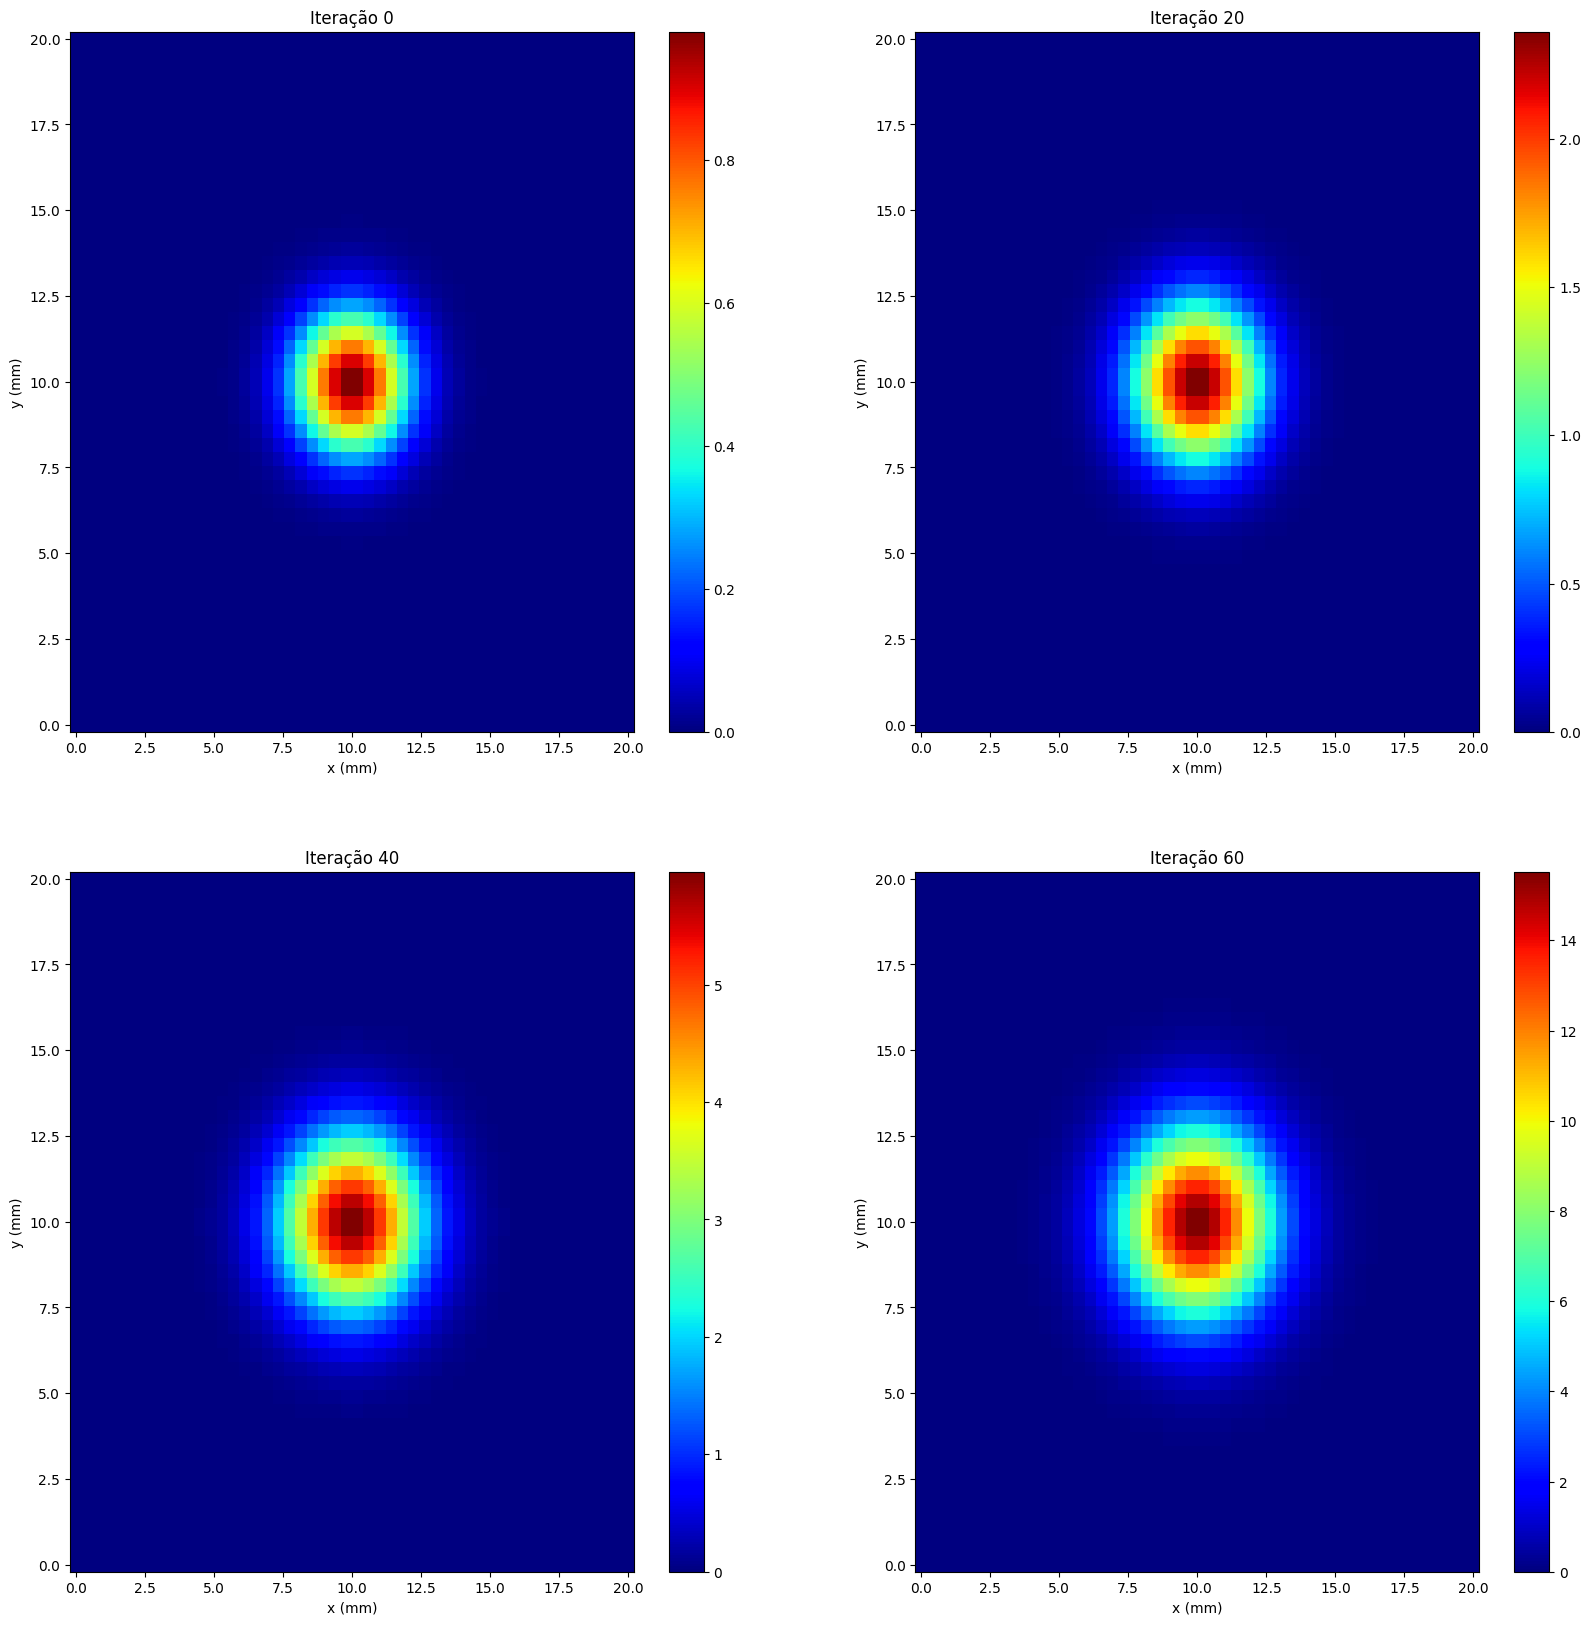

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (20, 20))

for i in range(2):
    for j in range(2):

        out = result[i*40 + j*20].reshape(len(spatial), len(spatial))
        pt = ax[i,j].pcolormesh(spatial * l, spatial * l, out, cmap='jet')
        ax[i,j].set_xlabel('x (mm)')
        ax[i,j].set_ylabel('y (mm)')
        ax[i,j].set_title(f'Iteração {i*40 + j*20}')
        plt.colorbar(pt)

plt.show()

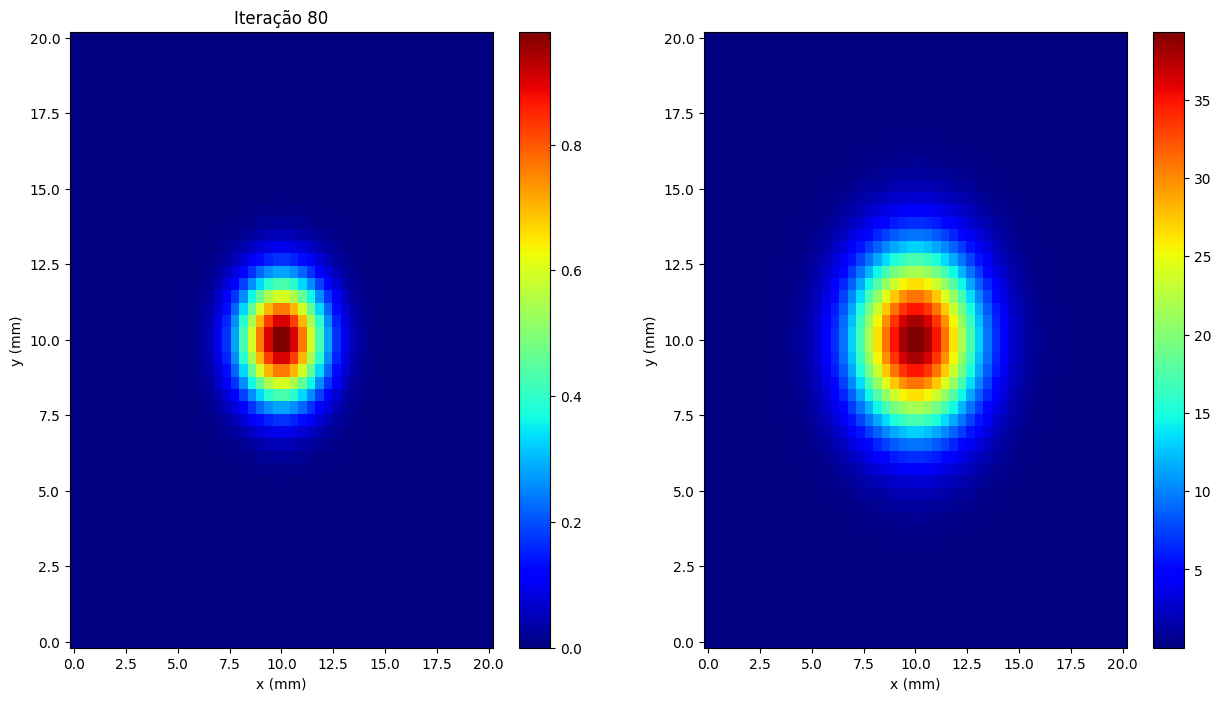

In [8]:
fig, ax = plt.subplots(ncols=2, figsize = (15, 8))

out1 = result[0].reshape(len(spatial), len(spatial))
out2 = result[-1].reshape(len(spatial), len(spatial))

p1 = ax[0].pcolormesh(spatial * l, spatial * l, out1, cmap='jet')
p2 = ax[1].pcolormesh(spatial * l, spatial * l, out2, cmap='jet')
ax[0].set_xlabel('x (mm)')
ax[0].set_ylabel('y (mm)')
ax[1].set_xlabel('x (mm)')
ax[1].set_ylabel('y (mm)')
ax[0].set_title('Iteração 0')
ax[0].set_title('Iteração 80')

plt.colorbar(p1)
plt.colorbar(p2)
plt.show()